In [44]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [45]:
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn
! pip install xgboost
! pip install lightgbm
! pip install statsmodels
! pip install flask



In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('malicious_phish.csv')

print(df.head())

                                                 url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement


In [48]:
#f = pd.read_csv('phishing_site_urls.csv')
#print(df.head())

In [49]:
df.shape
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   url     651191 non-null  str  
 1   type    651191 non-null  str  
dtypes: str(2)
memory usage: 9.9 MB


In [50]:
df.isnull().sum()



url     0
type    0
dtype: int64

In [51]:
df.type.value_counts

<bound method IndexOpsMixin.value_counts of 0           phishing
1             benign
2             benign
3         defacement
4         defacement
             ...    
651186      phishing
651187      phishing
651188      phishing
651189      phishing
651190      phishing
Name: type, Length: 651191, dtype: str>

In [52]:
! pip install nltk


In [53]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['tokens'] = df['url'].apply(tokenizer.tokenize)

In [54]:
df.url[0]
tokenizer.tokenize(df.url[0])


['br', 'icloud', 'com', 'br']

In [55]:
df['text_tokenized'] = df.url.map(lambda t: tokenizer.tokenize(t))
df.head()

,url,type,tokens,text_tokenized
0,br-icloud.com.br,phishing,"[br, icloud, com, br]","[br, icloud, com, br]"
1,mp3raid.com/music/krizz_kaliko.html,benign,"[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]"
2,bopsecrets.org/rexroth/cr/1.htm,benign,"[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecrets, org, rexroth, cr, 1, htm]"
3,http://www.garage-pirenne.be/index.php?option=...,defacement,"[http, www, garage, pirenne, be, index, php, o...","[http, www, garage, pirenne, be, index, php, o..."
4,http://adventure-nicaragua.net/index.php?optio...,defacement,"[http, adventure, nicaragua, net, index, php, ...","[http, adventure, nicaragua, net, index, php, ..."


In [56]:
df_phish = df[df.type=='phishing']
df_malware = df[df.type=='malware']
df_deface = df[df.type=='defacement']
df_benign = df[df.type=='benign']

In [57]:
! pip install wordcloud
from wordcloud import WordCloud

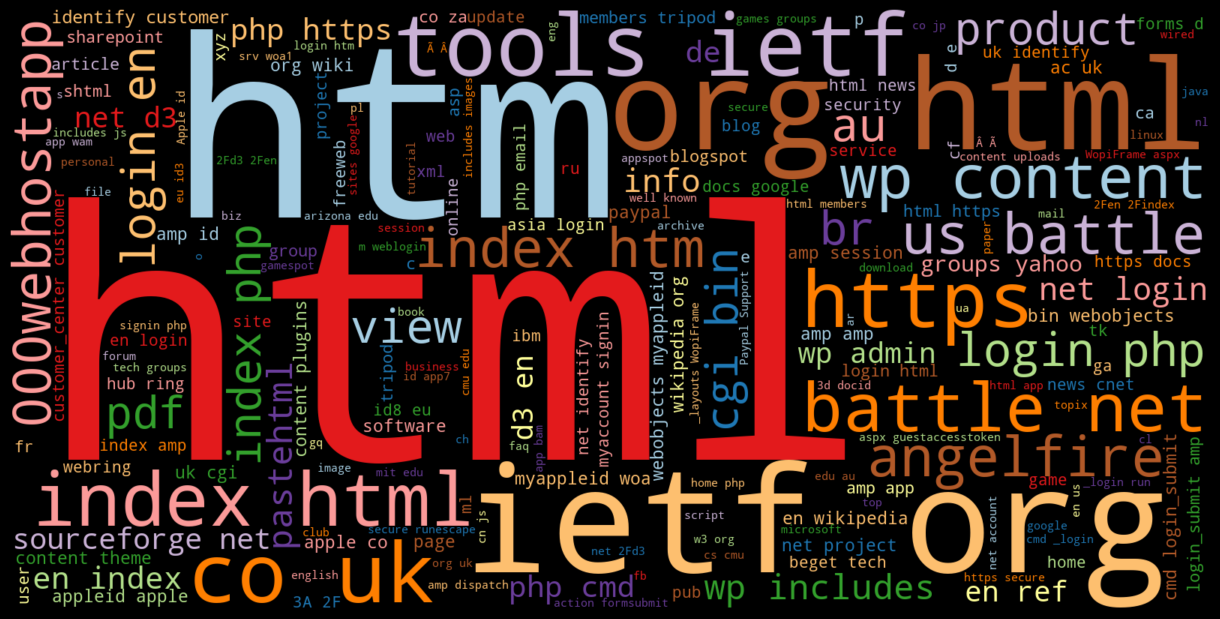

In [58]:
phish_url = " ".join(i for i in df_phish.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(phish_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

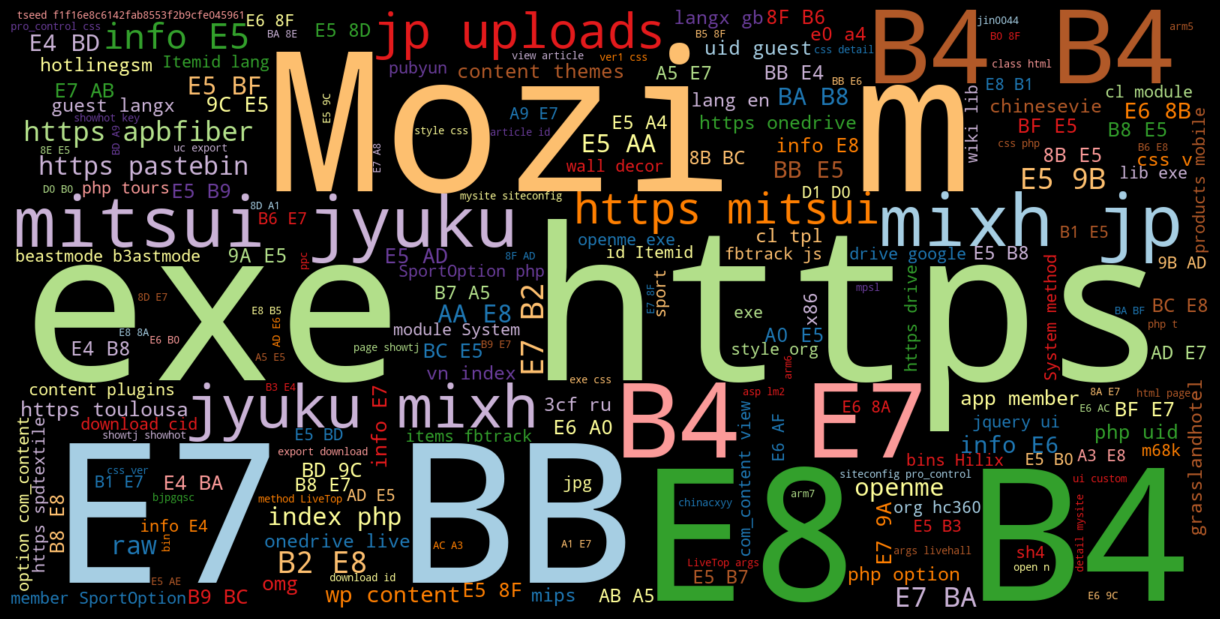

In [59]:
malware_url = " ".join(i for i in df_malware.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(malware_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [60]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
df.head()

,url,type,tokens,text_tokenized,text_stemmed
0,br-icloud.com.br,phishing,"[br, icloud, com, br]","[br, icloud, com, br]","[br, icloud, com, br]"
1,mp3raid.com/music/krizz_kaliko.html,benign,"[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]"
2,bopsecrets.org/rexroth/cr/1.htm,benign,"[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecret, org, rexroth, cr, 1, htm]"
3,http://www.garage-pirenne.be/index.php?option=...,defacement,"[http, www, garage, pirenne, be, index, php, o...","[http, www, garage, pirenne, be, index, php, o...","[http, www, garag, pirenn, be, index, php, opt..."
4,http://adventure-nicaragua.net/index.php?optio...,defacement,"[http, adventure, nicaragua, net, index, php, ...","[http, adventure, nicaragua, net, index, php, ...","[http, adventur, nicaragua, net, index, php, o..."


In [61]:
df['text'] = df['text_stemmed'].map(lambda l: ' '.join(l))
df.head()

,url,type,tokens,text_tokenized,text_stemmed,text
0,br-icloud.com.br,phishing,"[br, icloud, com, br]","[br, icloud, com, br]","[br, icloud, com, br]",br icloud com br
1,mp3raid.com/music/krizz_kaliko.html,benign,"[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]",mp3raid com music krizz_kaliko html
2,bopsecrets.org/rexroth/cr/1.htm,benign,"[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecret, org, rexroth, cr, 1, htm]",bopsecret org rexroth cr 1 htm
3,http://www.garage-pirenne.be/index.php?option=...,defacement,"[http, www, garage, pirenne, be, index, php, o...","[http, www, garage, pirenne, be, index, php, o...","[http, www, garag, pirenn, be, index, php, opt...",http www garag pirenn be index php option com_...
4,http://adventure-nicaragua.net/index.php?optio...,defacement,"[http, adventure, nicaragua, net, index, php, ...","[http, adventure, nicaragua, net, index, php, ...","[http, adventur, nicaragua, net, index, php, o...",http adventur nicaragua net index php option c...


In [62]:
df_phish = df[df.type=='phishing']
df_malware = df[df.type=='malware']
df_deface = df[df.type=='defacement']
df_benign = df[df.type=='benign']

In [63]:
df_benign.head()


,url,type,tokens,text_tokenized,text_stemmed,text
1,mp3raid.com/music/krizz_kaliko.html,benign,"[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]",mp3raid com music krizz_kaliko html
2,bopsecrets.org/rexroth/cr/1.htm,benign,"[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecret, org, rexroth, cr, 1, htm]",bopsecret org rexroth cr 1 htm
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,"[http, buzzfil, net, m, show, art, ils, etaien...","[http, buzzfil, net, m, show, art, ils, etaien...","[http, buzzfil, net, m, show, art, il, etaient...",http buzzfil net m show art il etaient loin de...
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,"[espn, go, com, nba, player, _, id, 3457, bran...","[espn, go, com, nba, player, _, id, 3457, bran...","[espn, go, com, nba, player, _, id, 3457, bran...",espn go com nba player _ id 3457 brandon rush
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,"[yourbittorrent, com, q, anthony, hamilton, so...","[yourbittorrent, com, q, anthony, hamilton, so...","[yourbittorr, com, q, anthoni, hamilton, soulif]",yourbittorr com q anthoni hamilton soulif


In [64]:
df_deface.head()

,url,type,tokens,text_tokenized,text_stemmed,text
3,http://www.garage-pirenne.be/index.php?option=...,defacement,"[http, www, garage, pirenne, be, index, php, o...","[http, www, garage, pirenne, be, index, php, o...","[http, www, garag, pirenn, be, index, php, opt...",http www garag pirenn be index php option com_...
4,http://adventure-nicaragua.net/index.php?optio...,defacement,"[http, adventure, nicaragua, net, index, php, ...","[http, adventure, nicaragua, net, index, php, ...","[http, adventur, nicaragua, net, index, php, o...",http adventur nicaragua net index php option c...
8,http://www.pashminaonline.com/pure-pashminas,defacement,"[http, www, pashminaonline, com, pure, pashminas]","[http, www, pashminaonline, com, pure, pashminas]","[http, www, pashminaonlin, com, pure, pashmina]",http www pashminaonlin com pure pashmina
11,http://www.ikenmijnkunst.nl/index.php/expositi...,defacement,"[http, www, ikenmijnkunst, nl, index, php, exp...","[http, www, ikenmijnkunst, nl, index, php, exp...","[http, www, ikenmijnkunst, nl, index, php, exp...",http www ikenmijnkunst nl index php expos expo...
13,http://www.lebensmittel-ueberwachung.de/index....,defacement,"[http, www, lebensmittel, ueberwachung, de, in...","[http, www, lebensmittel, ueberwachung, de, in...","[http, www, lebensmittel, ueberwachung, de, in...",http www lebensmittel ueberwachung de index ph...


In [65]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

In [66]:
all_text = ' '.join(df_benign['text'].tolist())

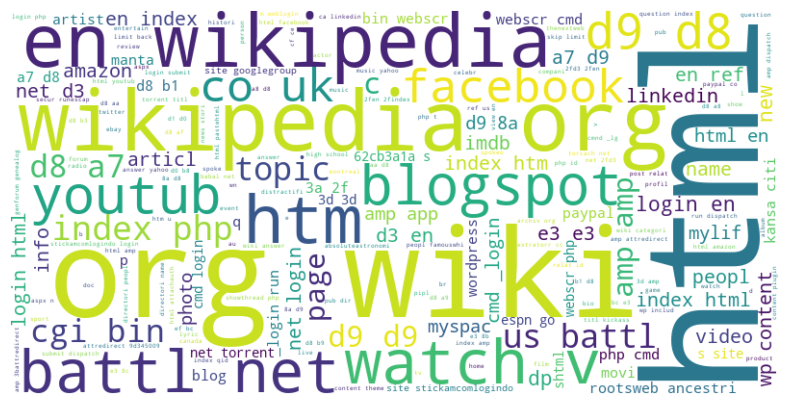

In [67]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [68]:
df.head()

,url,type,tokens,text_tokenized,text_stemmed,text
0,br-icloud.com.br,phishing,"[br, icloud, com, br]","[br, icloud, com, br]","[br, icloud, com, br]",br icloud com br
1,mp3raid.com/music/krizz_kaliko.html,benign,"[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]",mp3raid com music krizz_kaliko html
2,bopsecrets.org/rexroth/cr/1.htm,benign,"[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecret, org, rexroth, cr, 1, htm]",bopsecret org rexroth cr 1 htm
3,http://www.garage-pirenne.be/index.php?option=...,defacement,"[http, www, garage, pirenne, be, index, php, o...","[http, www, garage, pirenne, be, index, php, o...","[http, www, garag, pirenn, be, index, php, opt...",http www garag pirenn be index php option com_...
4,http://adventure-nicaragua.net/index.php?optio...,defacement,"[http, adventure, nicaragua, net, index, php, ...","[http, adventure, nicaragua, net, index, php, ...","[http, adventur, nicaragua, net, index, php, o...",http adventur nicaragua net index php option c...


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
features = cv.fit_transform(df.text)
features[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 569186))

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, df.type, test_size=0.2)


In [71]:
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression()
l_model.fit(x_train,y_train)

c:\Users\Shivam\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [72]:
l_model.score(x_test,y_test)
l_model.score(x_train, y_train)
from sklearn.metrics import classification_report
print('\nCLASSIFICATION REPORT\n')
print(classification_report(l_model.predict(x_test), y_test,
                            target_names =['df_phish','df_malware','df_deface','df_benign']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

    df_phish       0.99      0.95      0.97     89103
  df_malware       1.00      0.99      0.99     19441
   df_deface       0.96      0.99      0.97      6208
   df_benign       0.76      0.92      0.83     15487

    accuracy                           0.95    130239
   macro avg       0.93      0.96      0.94    130239
weighted avg       0.96      0.95      0.96    130239



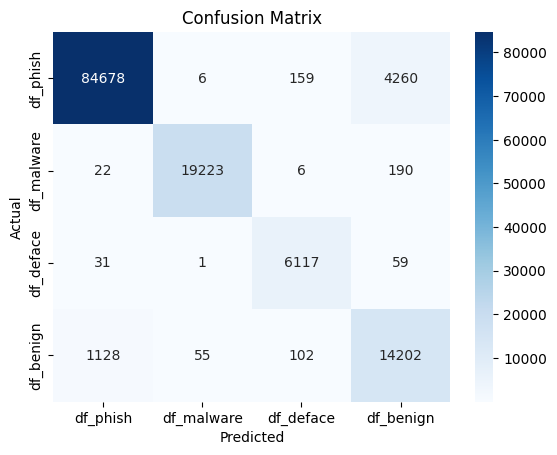

In [73]:
from sklearn.metrics import confusion_matrix
con_mat = pd.DataFrame(confusion_matrix(l_model.predict(x_test), y_test),
            columns = ['df_phish','df_malware','df_deface','df_benign'],
            index = ['df_phish','df_malware','df_deface','df_benign'])
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [74]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_test, y_test)

0.903607982248021

In [75]:
# Classical ML Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [76]:
models = {
    "Random Forest": RandomForestClassifier()
   
}


In [77]:
import pickle
pickle.dump(l_model, open('phishing.pkl','wb'))
pickle.dump(mnb, open('phishing_mnb.pkl','wb'))
pickle.dump(cv, open('vectorizer.pkl','wb'))
# Phishing URLs
predict_df_phish = [
'paypal-login-security-update.com/verify',
'secure-banking-login-alert.net/auth',
'account-verification-amazon-login.com',
'login-facebook-security-check.com'
]

# Malware URLs
predict_df_malware = [
'cracked-software-download.exe',
'free-movie-player-setup.exe',
'trojan-update-security-patch.exe',
'keygen-download-full-version.exe'
]

# Defacement URLs
predict_df_deface = [
'hacked-site.com/hacked-by-xyz',
'website.com/index_hacked.html',
'victimsite.org/defaced.html',
'serverbreach.net/hacked/home.html'
]

# Benign URLs
predict_df_benign = [
'youtube.com/',
'github.com/',
'wikipedia.org/',
'stackoverflow.com/'
]


In [78]:
test_sets = {
    "Phish": predict_df_phish,
    "Malware": predict_df_malware,
    "Deface": predict_df_deface,
    "Benign": predict_df_benign
}

for name, urls in test_sets.items():
    vec = cv.transform(urls)
    print(name, "->", rf_model.predict(vec))


NameError: name 'rf_model' is not defined

In [ ]:
# PyTorch Neural Network Training and Save Model
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Prepare data (assume df, features, x_train, x_test, y_train, y_test already exist)
le = LabelEncoder()
labels = le.fit_transform(df['type'])

# If y_train/y_test are pandas Series, convert to numpy
if hasattr(y_train, 'values'):
    y_train = y_train.values
if hasattr(y_test, 'values'):
    y_test = y_test.values

# Convert to torch tensors
x_train_tensor = torch.tensor(x_train.toarray(), dtype=torch.float32)
x_test_tensor = torch.tensor(x_test.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(le.transform(y_train), dtype=torch.long)
y_test_tensor = torch.tensor(le.transform(y_test), dtype=torch.long)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define model
class SimpleNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_dim = x_train_tensor.shape[1]
num_classes = len(le.classes_)
model = SimpleNN(input_dim, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
batch_size = 256
for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(x_train_tensor.size(0))
    for i in range(0, x_train_tensor.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train_tensor[indices].to(device), y_train_tensor[indices].to(device)
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(x_test_tensor.to(device))
    _, predicted = torch.max(outputs, 1)
    y_pred = predicted.cpu().numpy()

print("\nCLASSIFICATION REPORT\n")
print(classification_report(le.transform(y_test), y_pred, target_names=le.classes_))

cm = confusion_matrix(le.transform(y_test), y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("PyTorch NN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save model
with open('pytorch_model.pkl', 'wb') as f:
    pickle.dump({'model_state_dict': model.state_dict(), 'input_dim': input_dim, 'num_classes': num_classes}, f)
print('Model saved to pytorch_model.pkl')

NameError: name 'y_train' is not defined